In [3]:
# Imports e instalações

import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install scikit-learn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, f1_score)
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [4]:
# Carregando o DF

# df recebe o dataset
df = pd.read_csv(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\australia_clima_v7.csv', sep=',')
df

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao,vento_rajada_velocidade,vento_direcao_9h,...,amplitude_termica,umidade_media,variacao_pressao,latitude,longitude,indice_total_enso,anomalia_enso,evento_enso,mes_sin,mes_cos
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,16.3,48.5,4.7,-35.2931,149.1269,25.17,-1.50,la_nina,-5.000000e-01,0.866025
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,12.9,58.0,4.0,-35.2931,149.1269,25.17,-1.50,la_nina,-5.000000e-01,0.866025
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,9.7,75.5,2.3,-35.2931,149.1269,25.17,-1.50,la_nina,-5.000000e-01,0.866025
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,2.2,59.0,-1.5,-35.2931,149.1269,25.17,-1.50,la_nina,-5.000000e-01,0.866025
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,8.5,58.5,-0.2,-35.2931,149.1269,25.17,-1.50,la_nina,-5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50154,2017-06-25,Perth,4.9,16.8,0.0,1.6,7.9,E,39.0,E,...,11.9,56.5,2.5,-31.9559,115.8606,27.97,0.39,neutro,1.224647e-16,-1.000000
50155,2017-06-25,Melbourne,8.6,14.3,0.0,2.8,3.8,NW,35.0,N,...,5.7,61.5,2.4,-37.8142,144.9631,27.97,0.39,neutro,1.224647e-16,-1.000000
50156,2017-06-25,Melbourne,5.5,13.9,0.0,2.8,3.8,NNW,44.0,N,...,8.4,65.0,2.3,-37.8142,144.9631,27.97,0.39,neutro,1.224647e-16,-1.000000
50157,2017-06-25,Sydney,6.8,19.5,0.0,3.4,9.4,WSW,46.0,NW,...,12.7,54.5,3.2,-33.8678,151.2100,27.97,0.39,neutro,1.224647e-16,-1.000000


In [5]:
# Verificação de tamanho do DF
df.shape

(50159, 44)

In [6]:
# Verificação tipos de dados
df.dtypes

data                        object
localidade                  object
temp_min                   float64
temp_max                   float64
chuva_mm                   float64
evaporacao                 float64
horas_sol                  float64
vento_rajada_direcao        object
vento_rajada_velocidade    float64
vento_direcao_9h            object
vento_direcao_15h           object
vento_veloc_9h             float64
vento_veloc_15h            float64
umidade_9h                 float64
umidade_15h                float64
pressao_9h                 float64
pressao_15h                float64
nuvem_9h                   float64
nuvem_15h                  float64
temp_9h                    float64
temp_15h                   float64
choveu_hoje_fex             object
chove_amanha_vtr             int64
ano                          int64
mes                          int64
dia                          int64
trimestre_quarter            int64
horas_sol_isna                bool
evaporacao_isna     

In [7]:
# Verificação de valores nulos
df.isnull().sum()

data                       0
localidade                 0
temp_min                   0
temp_max                   0
chuva_mm                   0
evaporacao                 0
horas_sol                  0
vento_rajada_direcao       0
vento_rajada_velocidade    0
vento_direcao_9h           0
vento_direcao_15h          0
vento_veloc_9h             0
vento_veloc_15h            0
umidade_9h                 0
umidade_15h                0
pressao_9h                 0
pressao_15h                0
nuvem_9h                   0
nuvem_15h                  0
temp_9h                    0
temp_15h                   0
choveu_hoje_fex            0
chove_amanha_vtr           0
ano                        0
mes                        0
dia                        0
trimestre_quarter          0
horas_sol_isna             0
evaporacao_isna            0
nuvem_9h_isna              0
nuvem_15h_isna             0
pressao_9h_isna            0
pressao_15h_isna           0
choveu_hoje                0
amplitude_term

In [8]:
# Valores duplicados
duplicatas_reais = df.duplicated(keep="first")
qtd_duplicatas_reais = duplicatas_reais.sum()
print(qtd_duplicatas_reais)

0


In [9]:
# Convertendo a coluna de data para datetime e ordenando do mais antigo para o mais recente // split temporal
df['data'] = pd.to_datetime(df['data'], errors='coerce')
df = df.sort_values(by='data').reset_index(drop=True)
df.dtypes, display(df.head(3))

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao,vento_rajada_velocidade,vento_direcao_9h,...,amplitude_termica,umidade_media,variacao_pressao,latitude,longitude,indice_total_enso,anomalia_enso,evento_enso,mes_sin,mes_cos
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,16.3,48.5,4.7,-35.2931,149.1269,25.17,-1.5,la_nina,-0.5,0.866025
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,12.9,58.0,4.0,-35.2931,149.1269,25.17,-1.5,la_nina,-0.5,0.866025
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,9.7,75.5,2.3,-35.2931,149.1269,25.17,-1.5,la_nina,-0.5,0.866025


(data                       datetime64[ns]
 localidade                         object
 temp_min                          float64
 temp_max                          float64
 chuva_mm                          float64
 evaporacao                        float64
 horas_sol                         float64
 vento_rajada_direcao               object
 vento_rajada_velocidade           float64
 vento_direcao_9h                   object
 vento_direcao_15h                  object
 vento_veloc_9h                    float64
 vento_veloc_15h                   float64
 umidade_9h                        float64
 umidade_15h                       float64
 pressao_9h                        float64
 pressao_15h                       float64
 nuvem_9h                          float64
 nuvem_15h                         float64
 temp_9h                           float64
 temp_15h                          float64
 choveu_hoje_fex                    object
 chove_amanha_vtr                    int64
 ano       

In [10]:
# Definindo variável target
target = 'chove_amanha_vtr' # variável alvo que quero prever

In [11]:
# Removendo colunas irrelevantes
colunas_para_remover = ['data']

In [12]:
df_modelo = df.drop(columns=colunas_para_remover, errors="ignore")
df_modelo.head(3)

,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao,vento_rajada_velocidade,vento_direcao_9h,vento_direcao_15h,...,amplitude_termica,umidade_media,variacao_pressao,latitude,longitude,indice_total_enso,anomalia_enso,evento_enso,mes_sin,mes_cos
0,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,16.3,48.5,4.7,-35.2931,149.1269,25.17,-1.5,la_nina,-0.5,0.866025
1,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,12.9,58.0,4.0,-35.2931,149.1269,25.17,-1.5,la_nina,-0.5,0.866025
2,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,9.7,75.5,2.3,-35.2931,149.1269,25.17,-1.5,la_nina,-0.5,0.866025


In [13]:
# Separando colunas features e target

# X recebe todas as colunas exceto a target
# y recebe apenas a target
X = df_modelo.drop(columns=[target], errors="ignore")
y = df_modelo[target]

X.shape, y.shape

((50159, 42), (50159,))

In [14]:
# Definição do corte temporal com TimeSeriesSplit
# total_linhas recebe o total de linhas do df_modelo
total_linhas = len(df_modelo)

# indice_corte recebe o índice que separa treino e teste
indice_corte = int(total_linhas * 0.8)

In [15]:
df_modelo.shape

(50159, 43)

In [16]:
# Removendo o ISNA
colunas_isna = [c for c in X.columns if c.endswith("_isna")]
X = X.drop(columns=colunas_isna)
df_modelo = df_modelo.drop(columns=colunas_isna)

In [17]:
df_modelo.shape

(50159, 37)

In [18]:
# Criando treino e teste
# x_train recebe as linhas do início até o índice de corte
# x_test recebe as linhas do índice de corte até o final
X_train = X.iloc[:indice_corte]
X_test = X.iloc[indice_corte:]

# y_train recebe as linhas do início até o índice de corte
# y_test recebe as linhas do índice de corte até o final
y_train = y.iloc[:indice_corte]
y_test = y.iloc[indice_corte:]

# Conferindo as dimensões dos datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40127, 36), (10032, 36), (40127,), (10032,))

In [19]:
# Separando colunas numéricas e categóricas
colunas_categoricas = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
colunas_numericas = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

print(len(colunas_categoricas), len(colunas_numericas))

6 30


In [20]:
# Transformador categórico
transformador_categorico = OneHotEncoder(handle_unknown='ignore')

# Transformador numérico
transformador_numerico = StandardScaler()

# Criando o preprocessador
preprocessador = ColumnTransformer(transformers=[
    ('num', transformador_numerico, colunas_numericas),
    ('cat', transformador_categorico, colunas_categoricas)], remainder='drop')  
# Verificando o preprocessador

preprocessador.fit(X_train)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [21]:
# Modelo 
modelo = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

# Pipeline do modelo
pipeline = Pipeline(steps=[
    ('preprocessador', preprocessador),
    ('modelo', modelo)
])

In [22]:
# Treinando o modelo
# fit aprende parâmetros do scaler, mapeamento do onehot, pesos da regressão logística
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessador', ...), ('modelo', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

In [23]:
# Ger previsões

# y_pred recebe classe prevista (0 ou 1) com threshold padrão de 0.5
y_pred = pipeline.predict(X_test)

# y_proba recebe recebe a probabilidade de chove amanhã []:, 1] pega a coluna referente à classe "1"
y_proba = pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import average_precision_score

# matriz de confusão mostra:
# [ [TN, FP],
#   [FN, TP] ]
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

# classification_report mostra precision, recall e f1-score por classe
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# PR-AUC (Average Precision) é ótima para desbalanceamento
pr_auc = average_precision_score(y_test, y_proba)
print("\nPR-AUC (Average Precision):", pr_auc)

# ROC-AUC é complementar 
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)

Matriz de confusão:
[[6481 1407]
 [ 471 1673]]

Classification report:
              precision    recall  f1-score   support

           0     0.9322    0.8216    0.8735      7888
           1     0.5432    0.7803    0.6405      2144

    accuracy                         0.8128     10032
   macro avg     0.7377    0.8010    0.7570     10032
weighted avg     0.8491    0.8128    0.8237     10032


PR-AUC (Average Precision): 0.7003892597923914
ROC-AUC: 0.8835940219982743


### RandomForest

In [24]:
# transformador_categorico converte texto em colunas 0/1
# - handle_unknown evita erro em categorias novas
transformador_categorico = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False  
)

# preprocessor_rf aplica OneHot nas categóricas mantém numéricas como estão
preprocessor_rf = ColumnTransformer(
    transformers=[
        ("cat", transformador_categorico, colunas_categoricas),
        ("num", "passthrough", colunas_numericas),
    ],
    remainder="drop"
)

In [25]:
# modelo_rf recebe o RandomForest com parâmetros equilibrados
modelo_rf = RandomForestClassifier(
    n_estimators=400,          # número de árvores
    max_depth=50,            # deixa a árvore crescer controlado por outras regras
    min_samples_leaf=50,       # evita folhas muito pequenas parareduzir overfitting
    class_weight="balanced",   # trata desbalanceamento
    random_state=42,
    n_jobs=-1                  # usa todos os cores
)

In [26]:
pipeline_rf = Pipeline(
    steps=[
        ("preprocessamento", preprocessor_rf),
        ("modelo", modelo_rf)
    ]
)

pipeline_rf.fit(X_train, y_train)

# previsões de classe (threshold padrão 0.5)
y_pred_rf = pipeline_rf.predict(X_test)

# probabilidades da classe 1 (chuva)
y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]

print("Matriz de confusão (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification report (Random Forest):")
print(classification_report(y_test, y_pred_rf, digits=4))

# PR-AUC (métrica-chave)
pr_auc_rf = average_precision_score(y_test, y_proba_rf)
print("\nPR-AUC (Random Forest):", pr_auc_rf)

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC (Random Forest):", roc_auc_rf)

Matriz de confusão (Random Forest):
[[6470 1418]
 [ 500 1644]]

Classification report (Random Forest):
              precision    recall  f1-score   support

           0     0.9283    0.8202    0.8709      7888
           1     0.5369    0.7668    0.6316      2144

    accuracy                         0.8088     10032
   macro avg     0.7326    0.7935    0.7512     10032
weighted avg     0.8446    0.8088    0.8198     10032


PR-AUC (Random Forest): 0.6977471276181706
ROC-AUC (Random Forest): 0.8817235608216524


In [27]:
#!pip install xgboost
import xgboost as xgb

In [28]:
# Testando XGBoost Classifier

from xgboost import XGBClassifier


# n0 recebe quantos exemplos de classe 0 existem no treino
n0 = (y_train == 0).sum()

# n1 recebe quantos exemplos de classe 1 existem no treino
n1 = (y_train == 1).sum()

# scale_pos_weight recebe a razão entre negativos e positivos
# isso “equilibra” a penalidade da classe positiva
scale_pos_weight = n0 / n1

# Modelo XGB com parâmetros ajustados

modelo_xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.04,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="binary:logistic",
    eval_metric="aucpr",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

# Pipeline usando o mesmo processador do RF

pipeline_xgb = Pipeline(
    steps=[
        ("preprocessamento", preprocessor_rf),
        ("modelo", modelo_xgb)
    ]
)


# Treinando dados

pipeline_xgb.fit(X_train, y_train)


# Predição // Avaliação


y_pred_xgb = pipeline_xgb.predict(X_test)
y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

print("Matriz de confusão (XGB):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification report (XGB):")
print(classification_report(y_test, y_pred_xgb, digits=4))

pr_auc_xgb = average_precision_score(y_test, y_proba_xgb)
print("\nPR-AUC (XGB):", pr_auc_xgb)

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("ROC-AUC (XGB):", roc_auc_xgb)


Matriz de confusão (XGB):
[[6750 1138]
 [ 488 1656]]

Classification report (XGB):
              precision    recall  f1-score   support

           0     0.9326    0.8557    0.8925      7888
           1     0.5927    0.7724    0.6707      2144

    accuracy                         0.8379     10032
   macro avg     0.7626    0.8141    0.7816     10032
weighted avg     0.8599    0.8379    0.8451     10032


PR-AUC (XGB): 0.7465146425932798
ROC-AUC (XGB): 0.8999978240138052


In [29]:
# Testando XGBoost Classifier

from xgboost import XGBClassifier


# n0 recebe quantos exemplos de classe 0 existem no treino
n0 = (y_train == 0).sum()

# n1 recebe quantos exemplos de classe 1 existem no treino
n1 = (y_train == 1).sum()

# scale_pos_weight recebe a razão entre negativos e positivos
# isso “equilibra” a penalidade da classe positiva
scale_pos_weight = n0 / n1

# Modelo XGB com parâmetros ajustados

modelo_xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="binary:logistic",
    eval_metric="aucpr",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    #reg_lambda=1.0,
    reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
    n_jobs=-1
)

# Pipeline usando o mesmo processador do RF

pipeline_xgb = Pipeline(
    steps=[
        ("preprocessamento", preprocessor_rf),
        ("modelo", modelo_xgb)
    ]
)


# Treinando dados

pipeline_xgb.fit(X_train, y_train)


# Predição // Avaliação


y_pred_xgb = pipeline_xgb.predict(X_test)
y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

print("Matriz de confusão (XGB):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification report (XGB):")
print(classification_report(y_test, y_pred_xgb, digits=4))

pr_auc_xgb = average_precision_score(y_test, y_proba_xgb)
print("\nPR-AUC (XGB):", pr_auc_xgb)

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("ROC-AUC (XGB):", roc_auc_xgb)


Matriz de confusão (XGB):
[[6643 1245]
 [ 463 1681]]

Classification report (XGB):
              precision    recall  f1-score   support

           0     0.9348    0.8422    0.8861      7888
           1     0.5745    0.7840    0.6631      2144

    accuracy                         0.8297     10032
   macro avg     0.7547    0.8131    0.7746     10032
weighted avg     0.8578    0.8297    0.8384     10032


PR-AUC (XGB): 0.7460307890501561
ROC-AUC (XGB): 0.8999422417577427


In [ ]:
# df_modelo recebe o dataframe já tratado
# esse dataframe contém exatamente as mesmas colunas usadas no treino
# ele representa o dia que eu quero prever se vai chover ou não


# previsao recebe o resultado do método predict do pipeline
# esse método retorna apenas a classe prevista pelo modelo
# 0 significa que o modelo entende que NÃO vai chover
# 1 significa que o modelo entende que VAI chover
previsao = pipeline_xgb.predict(df_modelo)


# prob_chuva recebe o resultado do método predict_proba do pipeline
# predict_proba retorna duas probabilidades para cada linha:
# - a primeira é a probabilidade da classe 0 (não chove)
# - a segunda é a probabilidade da classe 1 (chove)
#
# usando [:, 1], eu seleciono somente a probabilidade da classe 1 que é a chance de chover
prob_chuva = pipeline.predict_proba(df_modelo)[:, 1]
previsao = pipeline.predict(df_modelo)
#prob_chuva = pipeline.predict_proba(df_modelo)[:, 1]

# previsao: classe prevista
# 0 = nao chove
# 1 = chove
previsao = pipeline.predict(df_modelo)

# prob_chuva: probabilidade da classe 1 (chove)
prob_chuva = pipeline.predict_proba(df_modelo)[:, 1]

# coluna com a classe prevista
# a coluna previsao_chuva recebe a classe prevista pelo modelo
# essa coluna contém apenas valores 0 ou 1
df_modelo["previsao_chuva"] = previsao


# coluna com a probabilidade de chuva
# a coluna probabilidade_chuva recebe a probabilidade de ocorrer chuva esse valor varia entre 0 e 1
df_modelo["probabilidade_chuva"] = prob_chuva

# mapeando a decisão do modelo
# a coluna decisao_modelo recebe uma versão em texto da classe prevista se o valor for 0, eu escrevo "Nao chove" se o valor for 1, eu escrevo "Chove"
df_modelo["decisao_modelo"] = df_modelo["previsao_chuva"].map({
    0: "Nao chove",
    1: "Chove"
})

# threshold recebe o valor mínimo de confiança que eu exijo para afirmar que vai chover nesse caso, eu exijo pelo menos 70% de chance
#threshold = ******0.70 /// 0.65
threshold = 0.65

# a coluna decisao_threshold recebe a decisão final baseada na probabilidade se a probabilidade for maior ou igual ao threshold, eu considero "Chove" se for menor, eu considero "Nao chove"
df_modelo["decisao_threshold"] = df_modelo["probabilidade_chuva"].apply(
    lambda x: "Chove" if x >= threshold else "Nao chove"
)

print("Decisao do modelo:", df_modelo["decisao_threshold"].iloc[0])
print("Probabilidade de chuva:", f"{df_modelo['probabilidade_chuva'].iloc[0] * 100:.1f}%")



Decisao do modelo: Nao chove
Probabilidade de chuva: 23.8%


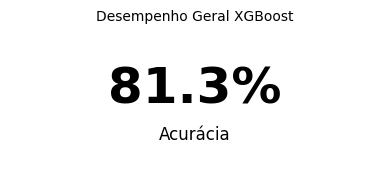

In [39]:
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(4, 2))
plt.axis("off")

plt.text(
    0.5, 0.6,
    f"{accuracy * 100:.1f}%",
    ha="center",
    va="center",
    fontsize=36,
    fontweight="bold"
)

plt.text(
    0.5, 0.3,
    "Acurácia",
    ha="center",
    va="center",
    fontsize=12
)

plt.title("Desempenho Geral XGBoost", fontsize=10)
plt.tight_layout()
plt.show()